# 1. Add Necessary Library

In [11]:
import IPython.display as ipd
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
import cv2
import glob

# 2. Understand Data

In [4]:
#Play voice
filename = "TEST/LanNgoc.wav"
ipd.Audio(filename)

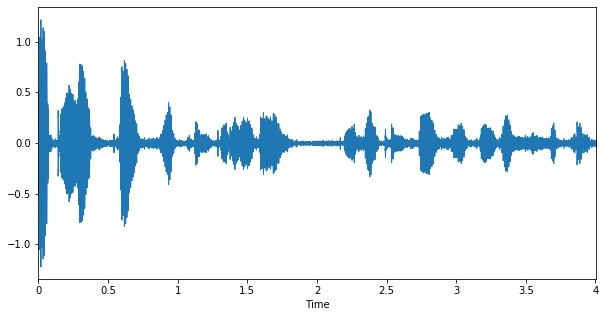

In [5]:
#Display
plt.figure(figsize=(10,5))
audio, sample_rate= librosa.load(filename)
librosa.display.waveplot(audio,sr=sample_rate)

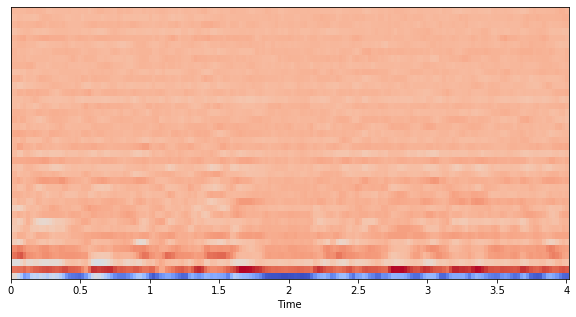

In [8]:
#Convert spectrogram
plt.figure(figsize=(10,5))
mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time');

# 3. Data Preparation

In [ ]:
def Extract_Features(file_name):
    '''
    - Return mfcc features of a audio file
    '''
    max_pad_len = 180
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        pad_width = max_pad_len - mfccs.shape[1]
        mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
        
    except Exception as e:
        print("Error encountered while parsing file: ", file_name)
        return None 
     
    return mfccs

In [ ]:
def Convert_Mfcc2Img(mfcc):
    '''
    Use: Convert mfcc feature to image, in order to save this image
    
    In: Mfcc feature
    Out: Image corresponding to mfcc feature
    '''
    mfcc = np.array(mfcc)
    
    MAX=np.max(mfcc);MIN=np.min(mfcc)
    
    NEW_MAX=255; NEW_MIN=0
    
    img_mfcc = (mfcc-MIN)/(MAX-MIN) * (NEW_MAX-NEW_MIN)
    
    return img_mfcc;

In [ ]:
import glob

audioPaths=[]

for audioPath in glob.glob('DATASET/**/*.wav', recursive=True):#DATASET folder, you must download it from my github.
    audioPaths.append(audioPath)
audioPaths

In [ ]:
n_files=20; i_ter=1;
for audioPath in audioPaths:
    if i_ter == 21:
        i_ter = 1
    print("Processing File {}".format(i_ter))
    
    data = Extract_Features(audioPath)
    
    class_label = audioPath.split(os.path.sep)[-2]
    
    
    name="DATA\\"+class_label+"\\"+str(i_ter)+".jpg";
    
    img_data=Convert_Mfcc2Img(data)
    resize_data = cv2.resize(img_data, (64,64))
    cv2.imwrite(name, resize_data)
    
    i_ter = i_ter + 1;

# 4. Data Generator

In [ ]:
#Load data
imagePaths = [];data=[];

for imagePath in glob.glob('DATA/**/*.jpg', recursive=True):
    imagePaths.append(imagePath)

for imagePath in imagePaths:
    print(imagePath)
    img=cv2.imread(imagePath,0)
    img=np.reshape(img, (64,64,1))
    data.append(img)
    
data = np.array(data, dtype="float")

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

def GenerateData(data_soucre):
    '''
    - Generate data from DATA folder with ImgeDataGenerator
    '''
    # Data Generator
    datagen = ImageDataGenerator(
                                    brightness_range = [0.5, 1.5],
                                    horizontal_flip=True
                                )
    datas = datagen.flow(data_soucre, batch_size=1)
    
    return datas;

datas = GenerateData(data)
print(datas)

In [ ]:
# Write datas to GDATA folder
i_ter=21
for i, imagePath in enumerate(imagePaths):
    if i_ter == 41:
        i_ter=21
    print("Processing File {}".format(i_ter))
    
    label = imagePath.split(os.path.sep)[-2]
    
    name="GDATA\\"+label+"\\"+str(i_ter)+".jpg";
    
    img=datas[i].reshape(64,64)
    
    cv2.imwrite(name, img)
    
    i_ter = i_ter + 1;